Estudio del *dataset* de Autextication:

In [1]:
# DATOS: https://sites.google.com/view/autextification ***HAY QUE CITARLO APROPIADAMENTE*** #

### IMPORTS ###
import pandas as pd
import numpy as np
import pathlib as pl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
### GOOGLE DRIVE ###
from google.colab import drive
drive.mount('/content/drive')

PATH = "/content/drive/My Drive/TFM/Data/Autextication/"

Mounted at /content/drive


In [4]:
### PARTICIÓN ###
df = pd.read_csv(PATH + "train_es.tsv",  sep='\t', on_bad_lines='skip')
df = df[['text', 'label']]
df = df.rename(columns={"text": "Text", "label": "Label"})
df.fillna(" ", inplace=True)

X_train = df['Text']
y_train = df['Label']

X_train, X_aux, y_train, y_aux = train_test_split(X_train, y_train, test_size=0.3, random_state=55, stratify=y_train)
X_val, X_test, y_val, y_test = train_test_split(X_aux, y_aux, test_size=0.66, random_state=55, stratify=y_aux)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

print('Tamaño conjunto de Entrenamiento:', len(X_train))
print('Tamaño conjunto de Validación:', len(X_val))
print('Tamaño conjunto de Evaluación:', len(X_test))

Tamaño conjunto de Entrenamiento: 22443
Tamaño conjunto de Validación: 3270
Tamaño conjunto de Evaluación: 6349


# **ESTUDIO TRAINING**

generated    11392
human        11051
Name: Label, dtype: int64


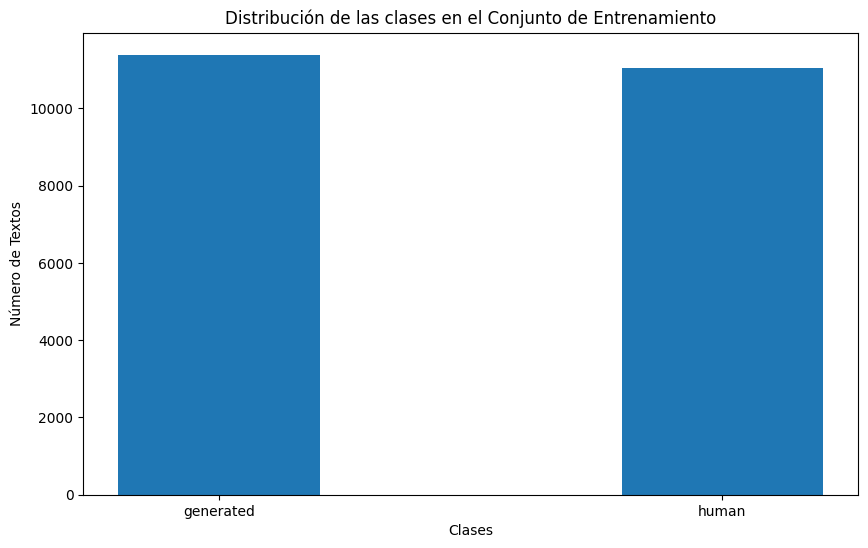

In [5]:
# Análisis de Distribución #
counts = y_train.value_counts()
print(counts)

counts_train = y_train.value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_train.keys()
values = counts_train.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Entrenamiento")
plt.show()

In [6]:
# Análisis de Longitud #
Train_len = X_train.apply(lambda text: len(str(text).split()))
Train_len.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    22443.000000
mean        52.316491
std         27.694589
min          2.000000
25%         21.000000
50%         64.000000
75%         78.000000
90%         83.000000
95%         86.000000
99%         89.000000
max        117.000000
Name: Text, dtype: float64

Text(0, 0.5, 'Número de textos')

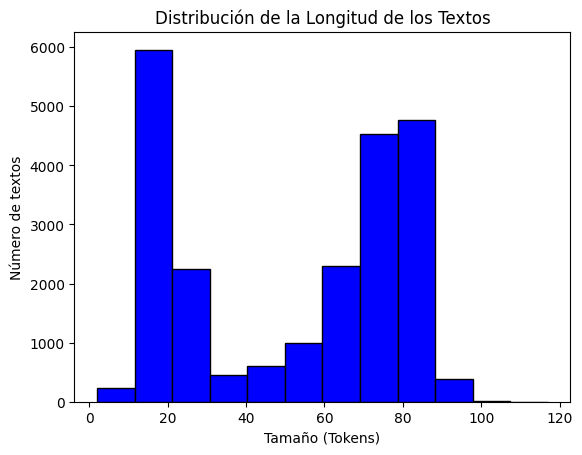

In [7]:
plt.hist(Train_len, color = 'blue', edgecolor = 'black', bins = int(60/5))
plt.title('Distribución de la Longitud de los Textos')
plt.xlabel('Tamaño (Tokens)')
plt.ylabel('Número de textos')

Text(0, 0.5, 'Densidad')

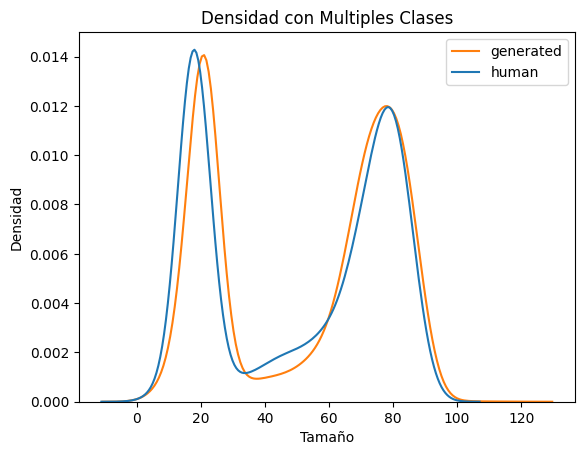

In [8]:
# Densidad de Clases #
Densidad = pd.DataFrame({'Length': Train_len, 'Label': y_train})
sns.kdeplot(data=Densidad, x='Length', hue='Label')

plt.legend(LABELS)
plt.title('Densidad con Multiples Clases')
plt.xlabel('Tamaño')
plt.ylabel('Densidad')

# **ESTUDIO VALIDACIÓN**

generated    1660
human        1610
Name: Label, dtype: int64


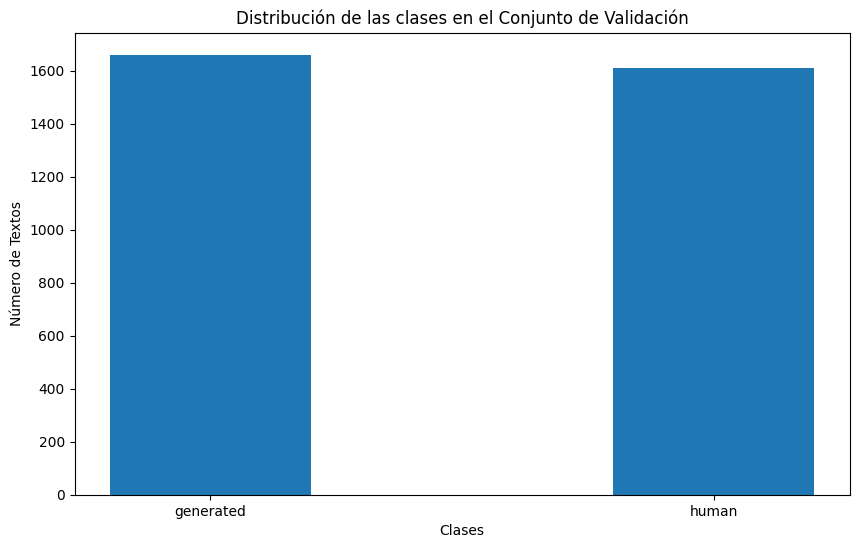

In [9]:
# Análisis de Distribución #
counts = y_val.value_counts()
print(counts)

counts_val = y_val.value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_val.keys()
values = counts_val.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Validación")
plt.show()

In [10]:
# Análisis de Longitud #
Val_len = X_val.apply(lambda text: len(str(text).split()))
Val_len.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    3270.000000
mean       51.022324
std        27.853358
min         2.000000
25%        20.000000
50%        62.000000
75%        77.000000
90%        83.000000
95%        86.000000
99%        90.000000
max        94.000000
Name: Text, dtype: float64

Text(0, 0.5, 'Número de textos')

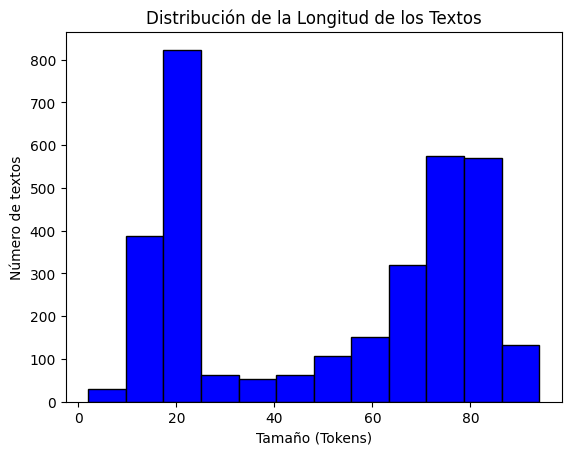

In [11]:
plt.hist(Val_len, color = 'blue', edgecolor = 'black', bins = int(60/5))
plt.title('Distribución de la Longitud de los Textos')
plt.xlabel('Tamaño (Tokens)')
plt.ylabel('Número de textos')

Text(0, 0.5, 'Densidad')

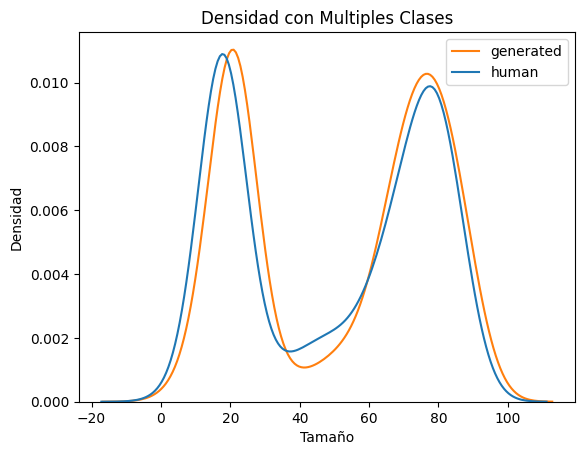

In [12]:
# Densidad de Clases #
Densidad2 = pd.DataFrame({'Length': Val_len, 'Label': y_val})
sns.kdeplot(data=Densidad2, x='Length', hue='Label')

plt.legend(LABELS)
plt.title('Densidad con Multiples Clases')
plt.xlabel('Tamaño')
plt.ylabel('Densidad')

# **ESTUDIO TEST**

generated    3223
human        3126
Name: Label, dtype: int64


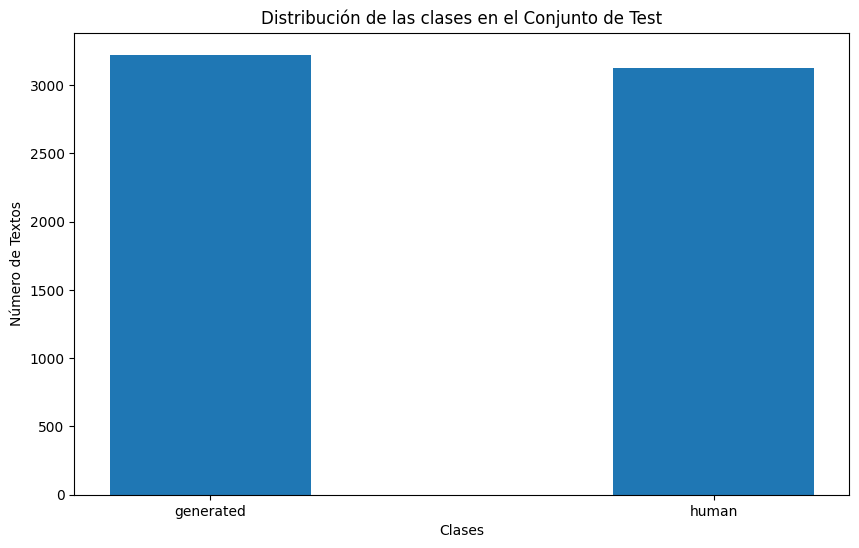

In [13]:
# Análisis de Distribución #
counts = y_test.value_counts()
print(counts)

counts_test = y_test.value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_test.keys()
values = counts_test.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Test")
plt.show()

In [14]:
# Análisis de Longitud #
Test_len = X_test.apply(lambda text: len(str(text).split()))
Test_len.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    6349.00000
mean       51.77713
std        27.75216
min         1.00000
25%        21.00000
50%        63.00000
75%        77.00000
90%        83.00000
95%        86.00000
99%        90.00000
max       131.00000
Name: Text, dtype: float64

Text(0, 0.5, 'Número de textos')

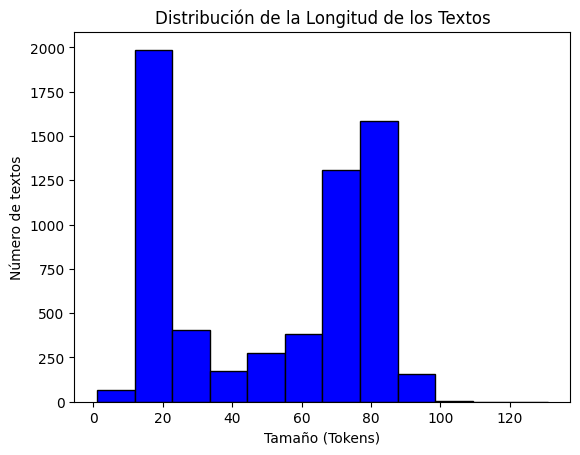

In [15]:
plt.hist(Test_len, color = 'blue', edgecolor = 'black', bins = int(60/5))
plt.title('Distribución de la Longitud de los Textos')
plt.xlabel('Tamaño (Tokens)')
plt.ylabel('Número de textos')

Text(0, 0.5, 'Densidad')

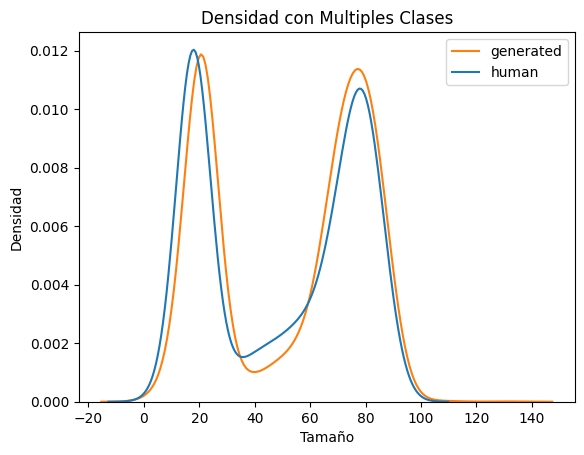

In [16]:
# Densidad de Clases #
Densidad3 = pd.DataFrame({'Length': Test_len, 'Label': y_test})
sns.kdeplot(data=Densidad3, x='Length', hue='Label')

plt.legend(LABELS)
plt.title('Densidad con Multiples Clases')
plt.xlabel('Tamaño')
plt.ylabel('Densidad')